In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import io
import zipfile
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
file_id = 'xyz' #-- Updated File ID for my zip
file_obj = drive.CreateFile({'id': file_id})
file_obj.GetContentFile('Finance_Data_Exc.zip') 

In [ ]:
from zipfile import ZipFile
zip = ZipFile('Finance_Data_Exc.zip')
zip.namelist()

['Finance_Data_Exc/PART_I_Pandas_Basics/',
 'Finance_Data_Exc/PART_I_Pandas_Basics/AMEX.csv',
 'Finance_Data_Exc/PART_I_Pandas_Basics/Exercise_01.ipynb',
 'Finance_Data_Exc/PART_I_Pandas_Basics/Exercise_01_Solution.ipynb',
 'Finance_Data_Exc/PART_I_Pandas_Basics/Exercise_02.ipynb',
 'Finance_Data_Exc/PART_I_Pandas_Basics/Exercise_02_Solution.ipynb',
 'Finance_Data_Exc/PART_I_Pandas_Basics/Exercise_03.ipynb',
 'Finance_Data_Exc/PART_I_Pandas_Basics/Exercise_03_Solution.ipynb',
 'Finance_Data_Exc/PART_I_Pandas_Basics/Exercise_04.ipynb',
 'Finance_Data_Exc/PART_I_Pandas_Basics/Exercise_04_Solution.ipynb',
 'Finance_Data_Exc/PART_I_Pandas_Basics/Exercise_05.ipynb',
 'Finance_Data_Exc/PART_I_Pandas_Basics/Exercise_05_Solution.ipynb',
 'Finance_Data_Exc/PART_I_Pandas_Basics/Exercise_06.ipynb',
 'Finance_Data_Exc/PART_I_Pandas_Basics/Exercise_06_Solution.ipynb',
 'Finance_Data_Exc/PART_I_Pandas_Basics/Exercise_07.ipynb',
 'Finance_Data_Exc/PART_I_Pandas_Basics/Exercise_07_Solution.ipynb',
 'F

In [ ]:
csvfile = zip.open('Finance_Data_Exc/PART_II_Financial_Data/us_stocks.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
stocks = pd.read_csv(csvfile, header = [0,1], index_col= [0], parse_dates= [0])

In [ ]:
stocks = stocks.loc["31-12-2015":"31-12-2018", "Adj Close"]

In [ ]:
stocks.head(5)

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,65.910294,104.660004,31.437597,108.968636,71.450706,56.722713
2016-01-04,64.052849,102.220001,31.017828,108.452126,70.514938,56.870766
2016-01-05,63.067310,102.730003,30.871820,109.946350,70.739891,58.221748
2016-01-06,61.315948,102.970001,30.187403,109.208458,70.056053,58.804699
2016-01-07,60.763893,97.919998,29.055828,106.681190,69.444221,60.174198


In [ ]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2015-12-31 to 2018-12-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AXP     754 non-null    float64
 1   FB      754 non-null    float64
 2   INTC    754 non-null    float64
 3   MCD     754 non-null    float64
 4   PG      754 non-null    float64
 5   WMT     754 non-null    float64
dtypes: float64(6)
memory usage: 41.2 KB


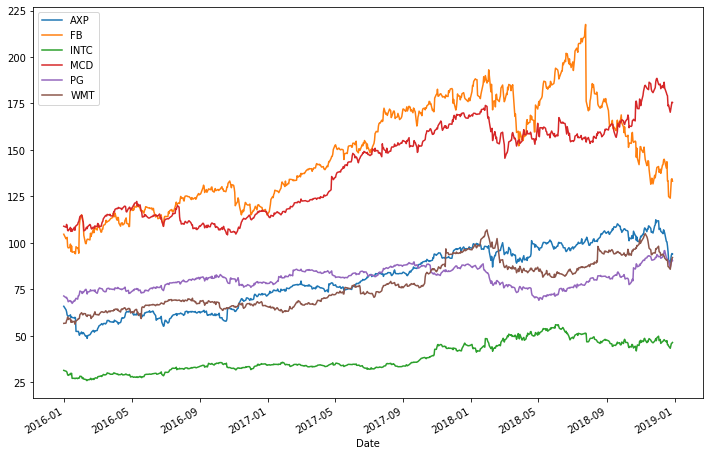

In [ ]:
stocks.plot(figsize = (12,8))
plt.show()

In [ ]:
stock_m = stocks.resample("M").last()

In [ ]:
stock_m.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,65.910294,104.660004,31.437597,108.968636,71.450706,56.722713
2016-01-31,50.922123,112.209999,28.307537,114.170799,74.142738,61.404896
2016-02-29,52.901901,106.919998,27.240244,108.911270,72.872086,61.386375
2016-03-31,58.441471,114.099998,29.781067,116.801506,74.705444,63.844990
2016-04-30,62.578789,117.580002,27.875446,117.554268,73.313026,62.334877


In [ ]:
ret = stock_m.pct_change().dropna()

In [ ]:
ret.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2016-01-31,-0.227403,0.072138,-0.099564,0.047740,0.037677,0.082545
2016-02-29,0.038879,-0.047144,-0.037703,-0.046067,-0.017138,-0.000302
2016-03-31,0.104714,0.067153,0.093275,0.072446,0.025159,0.040051
2016-04-30,0.070794,0.030500,-0.063988,0.006445,-0.018639,-0.023653
2016-05-31,0.005044,0.010461,0.052274,-0.035022,0.011483,0.066221


In [ ]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2016-01-31 to 2018-12-31
Freq: M
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AXP     36 non-null     float64
 1   FB      36 non-null     float64
 2   INTC    36 non-null     float64
 3   MCD     36 non-null     float64
 4   PG      36 non-null     float64
 5   WMT     36 non-null     float64
dtypes: float64(6)
memory usage: 2.0 KB


In [ ]:
ret.describe()

,AXP,FB,INTC,MCD,PG,WMT
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.012162,0.008656,0.012559,0.014179,0.007358,0.014997
std,0.065456,0.063183,0.058963,0.041817,0.039945,0.054054
min,-0.227403,-0.111877,-0.099564,-0.072468,-0.090572,-0.155629
25%,-0.006384,-0.040060,-0.013250,-0.010588,-0.017513,-0.018484
50%,0.016875,0.014658,0.009647,0.009956,0.013724,0.007687
75%,0.052982,0.054769,0.051412,0.048083,0.038161,0.053603
max,0.104714,0.132725,0.194590,0.079624,0.074899,0.117353


In [ ]:
summary = ret.agg(["mean", "std"]).T

In [ ]:
summary.head()

,mean,std
AXP,0.012162,0.065456
FB,0.008656,0.063183
INTC,0.012559,0.058963
MCD,0.014179,0.041817
PG,0.007358,0.039945


In [ ]:
summary["mean"] = summary["mean"]*12
summary["std"] = summary["std"]*np.sqrt(12)

In [ ]:
summary

,mean,std
Stock,,
AXP,0.145942,0.226748
FB,0.103868,0.218871
INTC,0.150712,0.204255
MCD,0.170144,0.144859
PG,0.088297,0.138374
WMT,0.179962,0.187247


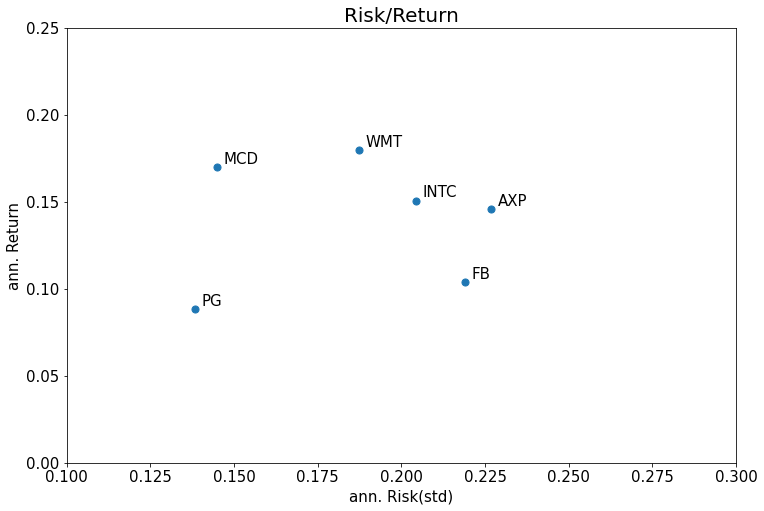

In [ ]:
summary.plot(kind = "scatter", x = "std", y = "mean", figsize = (12, 8), s = 50, fontsize = 15, xlim = (0.1, 0.3), ylim = (0, 0.25))
for i in summary.index:
  plt.annotate(i, xy=(summary.loc[i, "std"]+0.002, summary.loc[i, "mean"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [ ]:
ret.corr()

,AXP,FB,INTC,MCD,PG,WMT
AXP,1.000000,0.068655,0.306292,0.261880,-0.099335,-0.048483
FB,0.068655,1.000000,0.169326,0.069091,-0.008261,0.149272
INTC,0.306292,0.169326,1.000000,0.084089,-0.074533,0.129686
MCD,0.261880,0.069091,0.084089,1.000000,0.177252,0.505501
PG,-0.099335,-0.008261,-0.074533,0.177252,1.000000,0.359595
WMT,-0.048483,0.149272,0.129686,0.505501,0.359595,1.000000


In [ ]:
import seaborn as sns

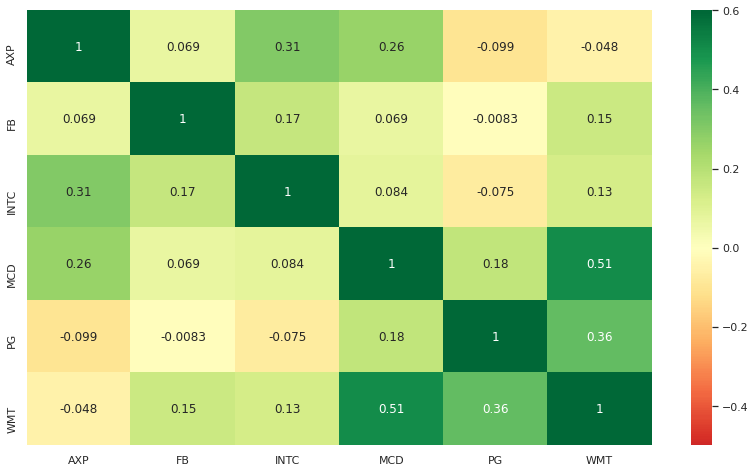

In [ ]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.0)
sns.heatmap(ret.corr(), cmap = "RdYlGn", annot = True, vmin = -0.5, vmax = 0.6, center = 0)
plt.show()